# **Estructura inicial**

In [1]:
import pandas as pd


In [70]:
file_path = "Metricas_Cuantitativas_Limpias2.xlsx"
df = pd.read_excel(file_path)

In [71]:
print(df.head())

           Equipo  Ayudas_Mutuas  Contradicciones  Acciones_Coordinadas  \
0  Equipo Juzgado            1.0              1.0                   1.0   
1        Equipo A            7.0              0.0                   3.0   
2        Equipo B            4.0              2.0                   4.0   
3             NaN            NaN              NaN                   NaN   
4             NaN            NaN              NaN                   NaN   

   Comunicacion_Abierta  Comunicacion_Cerrada  Comentarios_Constructivos  \
0                   3.0                   4.0                        0.0   
1                   5.0                   0.0                        3.0   
2                   3.0                   0.0                        3.0   
3                   NaN                   NaN                        NaN   
4                   NaN                   NaN                        NaN   

   Casos_Confianza  Casos_Desconfianza  Casos_Competencia  
0              0.0              

In [72]:
print(df.columns)

Index(['Equipo', 'Ayudas_Mutuas', 'Contradicciones', 'Acciones_Coordinadas',
       'Comunicacion_Abierta', 'Comunicacion_Cerrada',
       'Comentarios_Constructivos', 'Casos_Confianza', 'Casos_Desconfianza',
       'Casos_Competencia'],
      dtype='object')


In [73]:
print(df.isnull().sum())

Equipo                        8
Ayudas_Mutuas                10
Contradicciones              10
Acciones_Coordinadas         10
Comunicacion_Abierta         10
Comunicacion_Cerrada         10
Comentarios_Constructivos    10
Casos_Confianza              10
Casos_Desconfianza           10
Casos_Competencia            10
dtype: int64


In [74]:
columnas_numericas = df.columns[1:]
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors="coerce")

# **Promedios por Equipo**

In [75]:
df_promedios = df.groupby("Equipo").mean()

print(df_promedios)

                Ayudas_Mutuas  Contradicciones  Acciones_Coordinadas  \
Equipo                                                                 
Equipo                    NaN              NaN                   NaN   
Equipo A             3.666667         0.000000              2.666667   
Equipo B             3.666667         1.666667              4.000000   
Equipo Juzgado       1.000000         1.333333              1.000000   

                Comunicacion_Abierta  Comunicacion_Cerrada  \
Equipo                                                       
Equipo                           NaN                   NaN   
Equipo A                    4.000000              0.000000   
Equipo B                    2.333333              0.000000   
Equipo Juzgado              1.333333              1.333333   

                Comentarios_Constructivos  Casos_Confianza  \
Equipo                                                       
Equipo                                NaN              NaN   
Equipo A

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

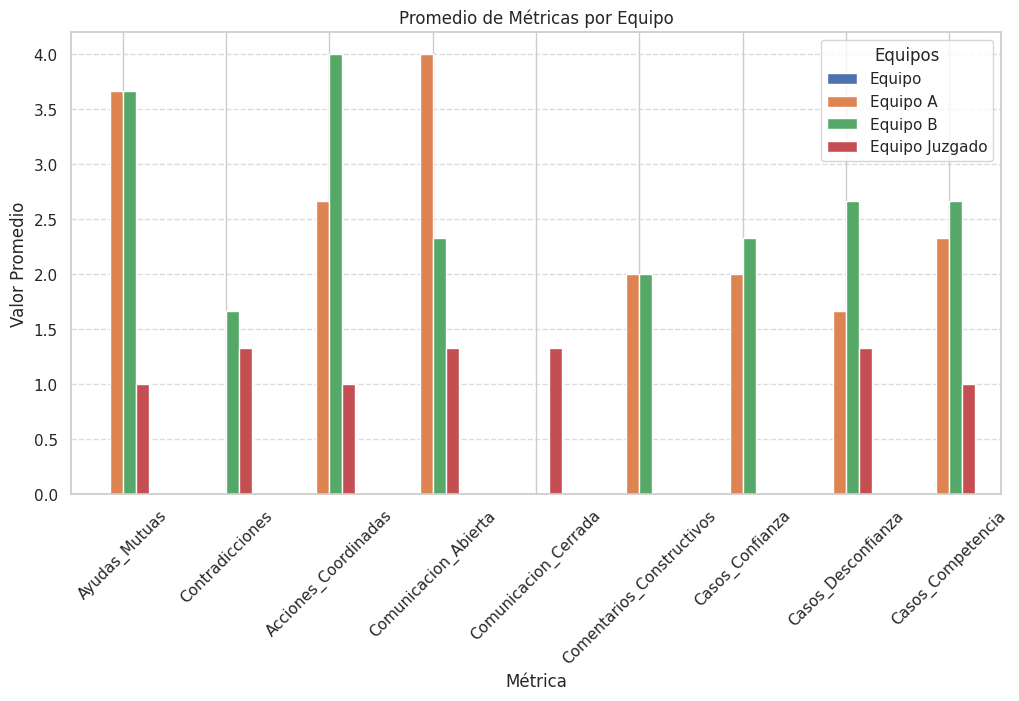

In [77]:
plt.figure(figsize=(12, 6))
df_promedios.T.plot(kind="bar", figsize=(12, 6))

plt.title("Promedio de Métricas por Equipo")
plt.xlabel("Métrica")
plt.ylabel("Valor Promedio")
plt.legend(title="Equipos")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# **Correlaciones**

In [78]:
corr_matrix = df_promedios.corr()
print(corr_matrix)

                           Ayudas_Mutuas  Contradicciones  \
Ayudas_Mutuas                   1.000000        -0.327327   
Contradicciones                -0.327327         1.000000   
Acciones_Coordinadas            0.896258         0.125730   
Comunicacion_Abierta            0.785714        -0.841698   
Comunicacion_Cerrada           -1.000000         0.327327   
Comentarios_Constructivos       1.000000        -0.327327   
Casos_Confianza                 0.991241        -0.199667   
Casos_Desconfianza              0.693375         0.453921   
Casos_Competencia               0.981981        -0.142857   

                           Acciones_Coordinadas  Comunicacion_Abierta  \
Ayudas_Mutuas                          0.896258              0.785714   
Contradicciones                        0.125730             -0.841698   
Acciones_Coordinadas                   1.000000              0.429838   
Comunicacion_Abierta                   0.429838              1.000000   
Comunicacion_Cerrada    

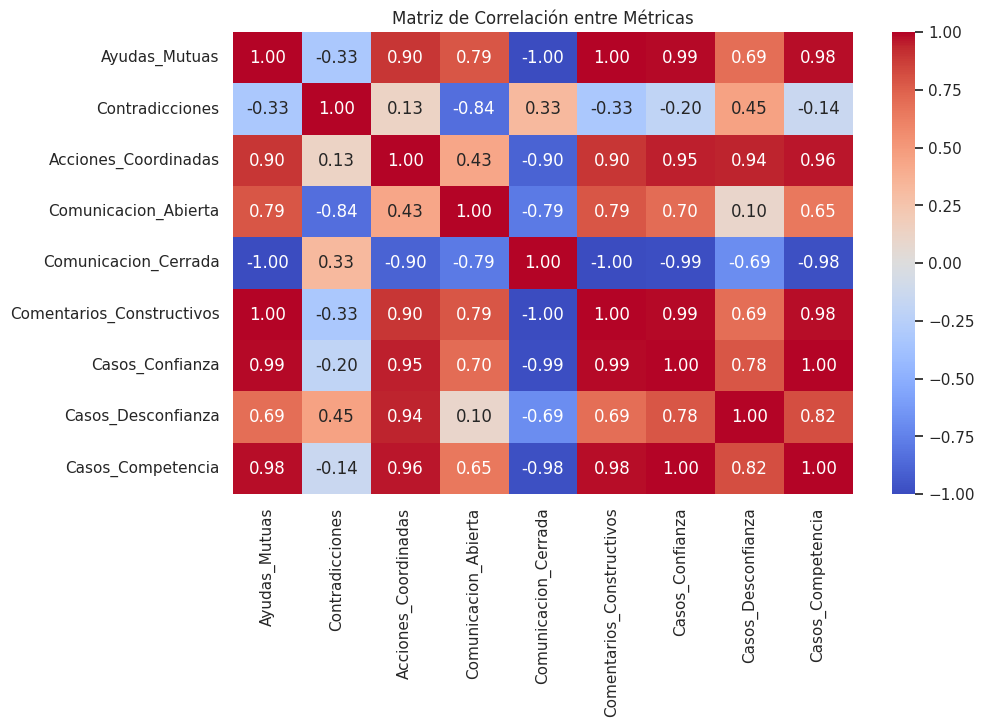

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matriz de Correlación entre Métricas")
plt.show()

# **Índice de Interdependencia Positiva (IIP)**

In [80]:
df_clean = df.dropna().copy()

In [81]:
df_clean["Acciones_Cooperativas"] = (df_clean["Ayudas_Mutuas"] +
                                     df_clean["Acciones_Coordinadas"] +
                                     df_clean["Comunicacion_Abierta"] +
                                     df_clean["Comentarios_Constructivos"] +
                                     df_clean["Casos_Confianza"])

In [82]:
df_clean["Acciones_Competitivas"] = df_clean["Casos_Desconfianza"] + df_clean["Casos_Competencia"]

In [83]:
df_clean["Acciones_Totales"] = df_clean["Acciones_Cooperativas"] + df_clean["Acciones_Competitivas"]


In [103]:
df_clean["IIP"] = (df_clean["Acciones_Cooperativas"] - df_clean["Acciones_Competitivas"]) / df_clean["Acciones_Totales"]

resultados_iip = df_clean[["Equipo", "IIP"]]
print(resultados_iip)

            Equipo       IIP
0   Equipo Juzgado -0.090909
1         Equipo A  0.666667
2         Equipo B  0.416667
8   Equipo Juzgado  1.000000
9         Equipo A  0.285714
10        Equipo B  0.600000
16  Equipo Juzgado  0.500000
17        Equipo A  0.647059
18        Equipo B  0.400000


<ipython-input-85-151d35a3c2fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Equipo", y="IIP", data=df_clean, palette="viridis")


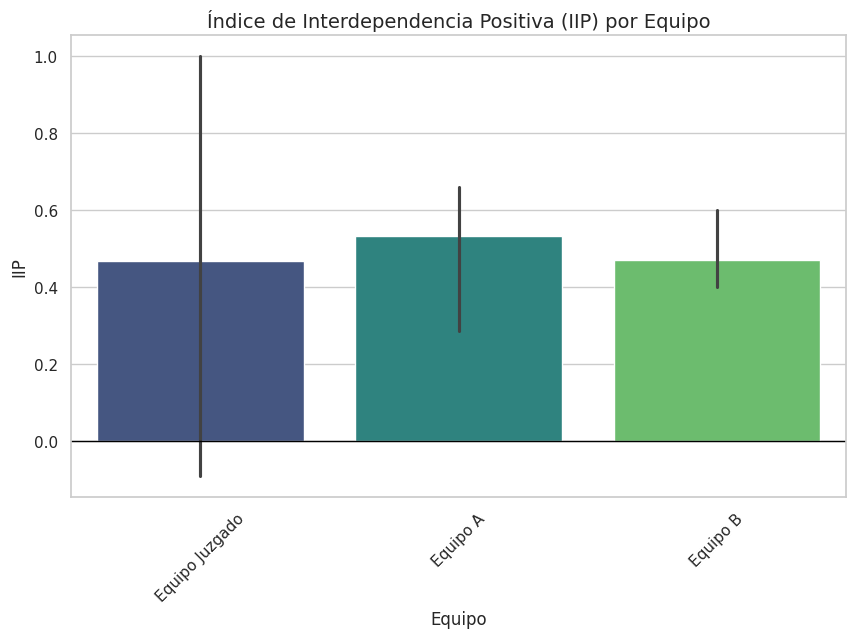

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Equipo", y="IIP", data=df_clean, palette="viridis")

plt.axhline(0, color="black", linewidth=1)
plt.title("Índice de Interdependencia Positiva (IIP) por Equipo", fontsize=14)
plt.xlabel("Equipo", fontsize=12)
plt.ylabel("IIP", fontsize=12)
plt.xticks(rotation=45)
plt.show()


# **Índice de Transparencia (IT) y el Nivel de Retroalimentación Positiva (NRP)**

In [86]:
df = df.dropna(subset=["Equipo"])

In [87]:
df["IT"] = (df["Comunicacion_Abierta"] - df["Comunicacion_Cerrada"]) / (
    df["Comunicacion_Abierta"] + df["Comunicacion_Cerrada"] + 1
)

In [88]:
df["NRP"] = df["Comentarios_Constructivos"] / (df["Comentarios_Constructivos"] + 1)

In [89]:
print(df[["Equipo", "IT", "NRP"]].head())

           Equipo        IT   NRP
0  Equipo Juzgado -0.125000  0.00
1        Equipo A  0.833333  0.75
2        Equipo B  0.750000  0.75
7          Equipo       NaN   NaN
8  Equipo Juzgado  0.000000  0.00


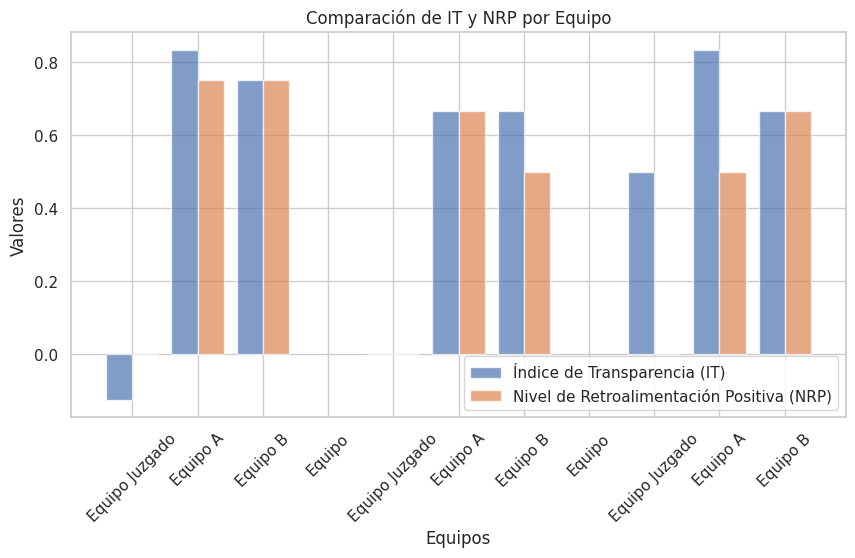

In [90]:

sns.set(style="whitegrid")


plt.figure(figsize=(10, 5))
bar_width = 0.4


x = range(len(df["Equipo"]))


plt.bar(x, df["IT"], width=bar_width, label="Índice de Transparencia (IT)", alpha=0.7)
plt.bar([i + bar_width for i in x], df["NRP"], width=bar_width, label="Nivel de Retroalimentación Positiva (NRP)", alpha=0.7)


plt.xticks([i + bar_width / 2 for i in x], df["Equipo"], rotation=45)
plt.xlabel("Equipos")
plt.ylabel("Valores")
plt.title("Comparación de IT y NRP por Equipo")
plt.legend()


plt.show()

# **Indice confianza interna (ICI) / sabotaje**

In [91]:
df["ICI"] = df["Casos_Confianza"] / (df["Casos_Confianza"] + df["Casos_Desconfianza"] + 1)

In [94]:
df["Sabotaje"] = df["Casos_Competencia"]

In [95]:
print(df[["Equipo", "ICI", "Sabotaje"]])

            Equipo       ICI  Sabotaje
0   Equipo Juzgado  0.000000       3.0
1         Equipo A  0.500000       3.0
2         Equipo B  0.428571       4.0
7           Equipo       NaN       NaN
8   Equipo Juzgado  0.000000       0.0
9         Equipo A  0.200000       2.0
10        Equipo B  0.500000       1.0
15          Equipo       NaN       NaN
16  Equipo Juzgado  0.000000       0.0
17        Equipo A  0.600000       2.0
18        Equipo B  0.200000       3.0


# **Orientación a la tarea vs a la relación**

In [97]:
df["ETR"] = (df["Ayudas_Mutuas"] + df["Acciones_Coordinadas"] + df["Comentarios_Constructivos"]) / \
            (df["Casos_Competencia"] + 1)
print(df[["Equipo", "ETR"]])


            Equipo   ETR
0   Equipo Juzgado  0.50
1         Equipo A  3.25
2         Equipo B  2.20
7           Equipo   NaN
8   Equipo Juzgado  2.00
9         Equipo A  2.00
10        Equipo B  3.50
15          Equipo   NaN
16  Equipo Juzgado  2.00
17        Equipo A  2.00
18        Equipo B  2.75


<ipython-input-98-764ca8a7d825>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Equipo"], y=df["ETR"], palette="coolwarm")


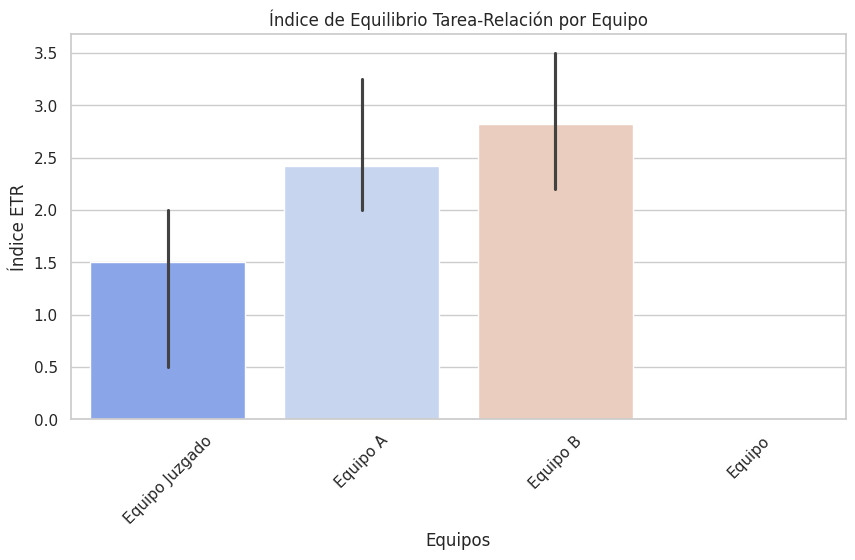

In [98]:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))

sns.barplot(x=df["Equipo"], y=df["ETR"], palette="coolwarm")

plt.xticks(rotation=45)
plt.xlabel("Equipos")
plt.ylabel("Índice ETR")
plt.title("Índice de Equilibrio Tarea-Relación por Equipo")

plt.show()


# **Manejo de conflictos**

In [99]:
df["TRC"] = (df["Ayudas_Mutuas"] + df["Acciones_Coordinadas"]) / (df["Casos_Desconfianza"] + 1)

In [101]:
df["IEC"] = (df["Casos_Desconfianza"] + df["Casos_Competencia"] ) / \
            (df["Ayudas_Mutuas"] + df["Acciones_Coordinadas"] + 1)
print(df[["Equipo", "TRC", "IEC"]])

            Equipo   TRC       IEC
0   Equipo Juzgado  0.50  2.000000
1         Equipo A  5.00  0.363636
2         Equipo B  2.00  0.777778
7           Equipo   NaN       NaN
8   Equipo Juzgado  2.00  0.000000
9         Equipo A  1.00  1.000000
10        Equipo B  2.00  0.428571
15          Equipo   NaN       NaN
16  Equipo Juzgado  1.00  0.333333
17        Equipo A  2.50  0.500000
18        Equipo B  2.25  0.600000


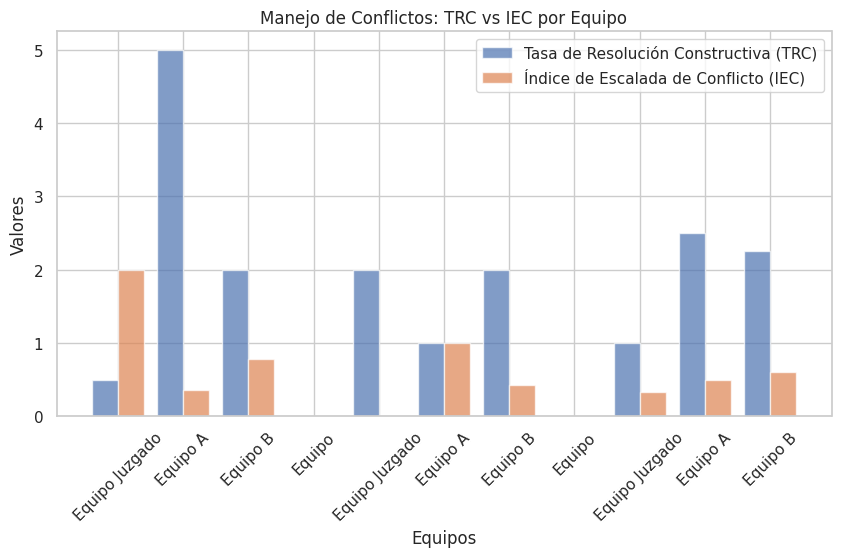

In [102]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))

bar_width = 0.4
x = range(len(df["Equipo"]))


plt.bar(x, df["TRC"], width=bar_width, label="Tasa de Resolución Constructiva (TRC)", alpha=0.7)
plt.bar([i + bar_width for i in x], df["IEC"], width=bar_width, label="Índice de Escalada de Conflicto (IEC)", alpha=0.7)


plt.xticks([i + bar_width / 2 for i in x], df["Equipo"], rotation=45)
plt.xlabel("Equipos")
plt.ylabel("Valores")
plt.title("Manejo de Conflictos: TRC vs IEC por Equipo")
plt.legend()


plt.show()
